# Análisis de Datos REPS 

## 1. Preparación del entorno

In [ ]:
# Librerías necesarias
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 2. Conectar a la base de datos SQLite

In [2]:
# Ruta al archivo SQLite
conn = sqlite3.connect("Database/reps.db")  

# Mostrar todas las tablas en la base de datos
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tablas = cursor.fetchall()
print("Tablas encontradas en la base de datos:", tablas)

Tablas encontradas en la base de datos: [('Municipios',), ('Prestadores',), ('consolidado',)]


## 3. Cargar las tablas a pandas

In [3]:
df_municipios = pd.read_sql_query("SELECT * FROM Municipios", conn)
df_prestadores = pd.read_sql_query("SELECT * FROM Prestadores", conn)
df_consolidado = pd.read_sql_query("SELECT * FROM Consolidado", conn)

## 4. Exploración inicial de cada tabla

In [4]:
# Función resumen rápida
def resumen(df):
    display(df.head())
    print(df.info())
    print(df.describe(include='all'))

# Municipios
print("=== MUNICIPIOS ===")
resumen(df_municipios)

# Prestadores
print("=== PRESTADORES ===")
resumen(df_prestadores)

# Consolidado
print("=== CONSOLIDADO ===")
resumen(df_consolidado)

=== MUNICIPIOS ===


,DP,Departamento,MPIO,Municipio,Superficie,PopTot,Rural,Region
0,5,ANTIOQUIA,5001,MEDELLíN,350.666623,2634570,1.6,Región Eje Cafetero
1,5,ANTIOQUIA,5002,ABEJORRAL,497.566213,21622,56.7,Región Eje Cafetero
2,5,ANTIOQUIA,5004,ABRIAQUí,287.641603,2872,64.2,Región Eje Cafetero
3,5,ANTIOQUIA,5021,ALEJANDRíA,119.467683,4989,40.7,Región Eje Cafetero
4,5,ANTIOQUIA,5030,AMAGá,89.245903,32628,47.4,Región Eje Cafetero


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DP            1118 non-null   int64  
 1   Departamento  1118 non-null   object 
 2   MPIO          1118 non-null   int64  
 3   Municipio     1118 non-null   object 
 4   Superficie    1117 non-null   float64
 5   PopTot        1118 non-null   int64  
 6   Rural         1117 non-null   float64
 7   Region        1118 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 70.0+ KB
None
                 DP Departamento          MPIO   Municipio    Superficie  \
count   1118.000000         1118   1118.000000        1118   1117.000000   
unique          NaN           33           NaN        1030           NaN   
top             NaN    ANTIOQUIA           NaN  VILLANUEVA           NaN   
freq            NaN          125           NaN           4           NaN   
mean      38.349

,depa_nombre,muni_nombre,codigo_habilitacion,nombre_prestador,tido_codigo,nits_nit,razon_social,clpr_codigo,clpr_nombre,ese,...,fecha_corte_REPS,telefono_adicional,email_adicional,rep_legal,Municipio_PDET,Municipio_ZOMAC,Municipio_PNIS,Municipio_PNSR_antes_2023,Municipio_PNSR_2023,Municipio_PNSR_2024
0,AMAZONAS,LETICIA,9100100148,ALEXANDER ABEL PEREZ FABRA,None,72291077.0,ALEXANDER ABEL PEREZ FABRA,2,Profesional Independiente,,...,Fecha corte REPS: May 15 2025 6:49PM,None,None,,NO,NO,NO,SI,SI,SI
1,AMAZONAS,LETICIA,9100100147,ALICIA PAOLA RUBIO CRUZ,None,1018433478.0,ALICIA PAOLA RUBIO CRUZ,2,Profesional Independiente,,...,Fecha corte REPS: May 15 2025 6:49PM,None,None,,NO,NO,NO,SI,SI,SI
2,AMAZONAS,LETICIA,9100100134,ALVARO ENRIQUE LEON LARA,None,13803322.0,ALVARO ENRIQUE LEON LARA,2,Profesional Independiente,,...,Fecha corte REPS: May 15 2025 6:49PM,None,None,,NO,NO,NO,SI,SI,SI
3,AMAZONAS,LETICIA,9100100038,ANA LUCIA DIAZ GUEVARA,None,51782620.0,ANA LUCIA DIAZ GUEVARA,2,Profesional Independiente,NO,...,Fecha corte REPS: May 15 2025 6:49PM,None,None,ANA LUCIA DIAZ GUEVARA,NO,NO,NO,SI,SI,SI
4,AMAZONAS,LETICIA,9100100107,ANDRES FELIPE ZAPATA HERNANDEZ,None,15877110.0,andres felipe zapata hernandez,2,Profesional Independiente,,...,Fecha corte REPS: May 15 2025 6:49PM,None,None,,NO,NO,NO,SI,SI,SI


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59398 entries, 0 to 59397
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   depa_nombre                59398 non-null  object
 1   muni_nombre                59398 non-null  object
 2   codigo_habilitacion        59398 non-null  object
 3   nombre_prestador           59398 non-null  object
 4   tido_codigo                0 non-null      object
 5   nits_nit                   59398 non-null  object
 6   razon_social               59398 non-null  object
 7   clpr_codigo                59398 non-null  object
 8   clpr_nombre                59398 non-null  object
 9   ese                        59398 non-null  object
 10  direccion                  59396 non-null  object
 11  telefono                   59343 non-null  object
 12  fax                        10490 non-null  object
 13  email                      59392 non-null  object
 14  gerent

,depa_codigo,depa_nombre,total_prestadores,total_sedes,total_servicios,total_camas,total_salas,total_sillas,total_ambulancias
0,5,Antioquia,11487,16106,31310,13028,2861,0,742
1,8,Atlántico,2474,2907,12441,7337,1052,0,257
2,11,Bogotá D.C,13758,16059,35276,15402,2774,0,934
3,13,Bolívar,1624,2096,9040,5049,752,0,258
4,15,Boyacá,1607,1928,6238,1939,506,0,291


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   depa_codigo        33 non-null     int64 
 1   depa_nombre        33 non-null     object
 2   total_prestadores  33 non-null     int64 
 3   total_sedes        33 non-null     int64 
 4   total_servicios    33 non-null     int64 
 5   total_camas        33 non-null     int64 
 6   total_salas        33 non-null     int64 
 7   total_sillas       33 non-null     int64 
 8   total_ambulancias  33 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.4+ KB
None
        depa_codigo depa_nombre  total_prestadores   total_sedes  \
count     33.000000          33          33.000000     33.000000   
unique          NaN          33                NaN           NaN   
top             NaN   Antioquia                NaN           NaN   
freq            NaN           1                NaN    

## 5. Verificación y Limpieza 

### 5.1 Se borran los registros sin datos en DF Municipios

In [5]:
df_municipios_limpio = df_municipios.dropna()
df_municipios_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117 entries, 0 to 1117
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DP            1117 non-null   int64  
 1   Departamento  1117 non-null   object 
 2   MPIO          1117 non-null   int64  
 3   Municipio     1117 non-null   object 
 4   Superficie    1117 non-null   float64
 5   PopTot        1117 non-null   int64  
 6   Rural         1117 non-null   float64
 7   Region        1117 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 78.5+ KB


### 5.2 Verificación y limpieza de nombres de departamentos en DFs Municipios y Prestadores

In [6]:
# Valores únicos en cada DataFrame
departamentos_muni = set(df_municipios_limpio['Departamento'].str.upper().unique())
departamentos_conso = set(df_consolidado['depa_nombre'].str.upper().unique())
departamentos_prest = set(df_prestadores['depa_nombre'].str.upper().unique())

# Departamentos comunes
comunes = departamentos_muni.intersection(departamentos_prest)
# Departamentos en Prestadores que no están en Municipios/Consolidado
diferentes = departamentos_prest.difference(departamentos_muni)

print("Total departamentos en Municipios:", len(departamentos_muni))
print("Total departamentos en Consolidado:", len(departamentos_conso))
print("Total departamentos en Prestadores:", len(departamentos_prest))
print("Departamentos adicionales/diferentes en Prestadores:")
print(sorted(diferentes))

Total departamentos en Municipios: 33
Total departamentos en Consolidado: 33
Total departamentos en Prestadores: 38
Departamentos adicionales/diferentes en Prestadores:
['BARRANQUILLA', 'BOGOTÁ D.C', 'BUENAVENTURA', 'CALI', 'CARTAGENA', 'SAN ANDRÉS Y PROVIDENCIA', 'SANTA MARTA']


In [7]:
# Impresión nombres en campo de departamentos de las 3 tablas
print(df_prestadores['depa_nombre'].str.upper().unique())
print(df_municipios_limpio['Departamento'].str.upper().unique())
print(df_consolidado['depa_nombre'].str.upper().unique())

['AMAZONAS' 'ANTIOQUIA' 'ARAUCA' 'ATLÁNTICO' 'BARRANQUILLA' 'BOGOTÁ D.C'
 'BOLÍVAR' 'BOYACÁ' 'BUENAVENTURA' 'CALDAS' 'CALI' 'CAQUETÁ' 'CARTAGENA'
 'CASANARE' 'CAUCA' 'CESAR' 'CHOCÓ' 'CÓRDOBA' 'CUNDINAMARCA' 'GUAINÍA'
 'GUAVIARE' 'HUILA' 'LA GUAJIRA' 'MAGDALENA' 'META' 'NARIÑO'
 'NORTE DE SANTANDER' 'PUTUMAYO' 'QUINDÍO' 'RISARALDA'
 'SAN ANDRÉS Y PROVIDENCIA' 'SANTA MARTA' 'SANTANDER' 'SUCRE' 'TOLIMA'
 'VALLE DEL CAUCA' 'VAUPÉS' 'VICHADA']
['ANTIOQUIA' 'ATLÁNTICO' 'BOGOTÁ D C' 'BOLÍVAR' 'BOYACÁ' 'CALDAS'
 'CAQUETÁ' 'CAUCA' 'CESAR' 'CÓRDOBA' 'CUNDINAMARCA' 'CHOCÓ' 'HUILA'
 'LA GUAJIRA' 'MAGDALENA' 'META' 'NARIÑO' 'NORTE DE SANTANDER' 'QUINDÍO'
 'RISARALDA' 'SANTANDER' 'SUCRE' 'TOLIMA' 'VALLE DEL CAUCA' 'ARAUCA'
 'CASANARE' 'PUTUMAYO' 'SAN ANDRÉS' 'AMAZONAS' 'GUAINÍA' 'GUAVIARE'
 'VAUPÉS' 'VICHADA']
['ANTIOQUIA' 'ATLÁNTICO' 'BOGOTÁ D.C' 'BOLÍVAR' 'BOYACÁ' 'CALDAS'
 'CAQUETÁ' 'CAUCA' 'CESAR' 'CÓRDOBA' 'CUNDINAMARCA' 'CHOCÓ' 'HUILA'
 'LA GUAJIRA' 'MAGDALENA' 'META' 'NARIÑO' 'NORTE DE SANTAN

In [8]:
# Correcciones en df_municipios
df_municipios_limpio["Departamento"] = df_municipios_limpio["Departamento"].replace({
    "BOGOTá D C": "BOGOTÁ D.C",
    "SAN ANDRéS": "SAN ANDRÉS Y PROVIDENCIA"
})
print(df_municipios_limpio['Departamento'].str.upper().unique())

['ANTIOQUIA' 'ATLÁNTICO' 'BOGOTÁ D.C' 'BOLÍVAR' 'BOYACÁ' 'CALDAS'
 'CAQUETÁ' 'CAUCA' 'CESAR' 'CÓRDOBA' 'CUNDINAMARCA' 'CHOCÓ' 'HUILA'
 'LA GUAJIRA' 'MAGDALENA' 'META' 'NARIÑO' 'NORTE DE SANTANDER' 'QUINDÍO'
 'RISARALDA' 'SANTANDER' 'SUCRE' 'TOLIMA' 'VALLE DEL CAUCA' 'ARAUCA'
 'CASANARE' 'PUTUMAYO' 'SAN ANDRÉS Y PROVIDENCIA' 'AMAZONAS' 'GUAINÍA'
 'GUAVIARE' 'VAUPÉS' 'VICHADA']


C:\Users\luist\AppData\Local\Temp\ipykernel_6140\712098605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_municipios_limpio["Departamento"] = df_municipios_limpio["Departamento"].replace({


In [9]:
# Corrección del nombre del Departamento en DF Prestadores
df_prestadores["depa_nombre"] = df_prestadores["depa_nombre"].replace({
    "BARRANQUILLA": "ATLáNTICO",
    "BUENAVENTURA": "VALLE DEL CAUCA",
    "CALI": "VALLE DEL CAUCA",
    "CARTAGENA": "BOLíVAR",
    "SANTA MARTA": "MAGDALENA"
})

In [10]:
# Se verifican los nombres de los departamentos en los 3 DFs
# Valores únicos en cada DataFrame
departamentos_muni = set(df_municipios_limpio['Departamento'].str.upper().unique())
departamentos_conso = set(df_consolidado['depa_nombre'].str.upper().unique())
departamentos_prest = set(df_prestadores['depa_nombre'].str.upper().unique())

# Departamentos comunes
comunes = departamentos_muni.intersection(departamentos_prest)
# Departamentos en Prestadores que no están en Municipios/Consolidado
diferentes = departamentos_prest.difference(departamentos_muni)

print("Total departamentos en Municipios:", len(departamentos_muni))
print("Total departamentos en Consolidado:", len(departamentos_conso))
print("Total departamentos en Prestadores:", len(departamentos_prest))
print("Departamentos adicionales/diferentes en Prestadores:")
print(sorted(diferentes))

Total departamentos en Municipios: 33
Total departamentos en Consolidado: 33
Total departamentos en Prestadores: 33
Departamentos adicionales/diferentes en Prestadores:
[]


### 5.3 Conversión tipo de dato texto -> fecha en campos de fechas DF Prestadores

In [11]:
# Revisar fechas en Prestadores (si están en formato string "yyyymmdd")
df_prestadores['fecha_radicacion'] = pd.to_datetime(df_prestadores['fecha_radicacion'], format='%Y%m%d', errors='coerce')
df_prestadores['fecha_vencimiento'] = pd.to_datetime(df_prestadores['fecha_vencimiento'], format='%Y%m%d', errors='coerce')
df_prestadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59398 entries, 0 to 59397
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   depa_nombre                59398 non-null  object        
 1   muni_nombre                59398 non-null  object        
 2   codigo_habilitacion        59398 non-null  object        
 3   nombre_prestador           59398 non-null  object        
 4   tido_codigo                0 non-null      object        
 5   nits_nit                   59398 non-null  object        
 6   razon_social               59398 non-null  object        
 7   clpr_codigo                59398 non-null  object        
 8   clpr_nombre                59398 non-null  object        
 9   ese                        59398 non-null  object        
 10  direccion                  59396 non-null  object        
 11  telefono                   59343 non-null  object        
 12  fax 

### 5.4 Verificación y Limpieza de nombres de Municipios en los DFs Municipios y Prestadores

In [12]:
# Verificar si MPIO tiene un único nombre de Municipio 
duplicates = df_municipios_limpio.groupby("MPIO")["Municipio"].nunique()
non_unique = duplicates[duplicates > 1]

if non_unique.empty:
    print("✅ Cada MPIO tiene exactamente 1 Municipio.")
else:
    print("⚠️ Algunos ´codigos MPIO tienen múltiples nombres de Municipio:")
    print(non_unique)

✅ Cada MPIO tiene exactamente 1 Municipio.


In [13]:
# Se estandarizan ambas columnas para evitar problemas con acentos o mayúsculas
df_municipios_limpio["Municipio_std"] = df_municipios_limpio["Municipio"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.strip()
df_prestadores["muni_nombre_std"] = df_prestadores["muni_nombre"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.strip()

C:\Users\luist\AppData\Local\Temp\ipykernel_6140\3846896621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_municipios_limpio["Municipio_std"] = df_municipios_limpio["Municipio"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.strip()


In [14]:
# Se comparan nombres punicos de ciudades
municipios_set = set(df_municipios_limpio["Municipio_std"].unique())
prestadores_set = set(df_prestadores["muni_nombre_std"].unique())

only_in_prestadores = prestadores_set - municipios_set
only_in_municipios = municipios_set - prestadores_set

print("❌ Ciudades sólo en Prestadores:")
print(sorted(only_in_prestadores))

print("\n❌ Ciudades sólo en Municipios:")
print(sorted(only_in_municipios))

❌ Ciudades sólo en Prestadores:
['BELEN DE BAJIRA', 'BOGOTA', 'CHIBOLO', 'DIBULLA', 'GUACHENE', 'PUEBLOVIEJO', 'RIOBLANCO', 'SINCE', 'TUMACO', 'VALLE DEL GUAMUEZ', 'VISTAHERMOSA']

❌ Ciudades sólo en Municipios:
['ABRIAQUI', 'ALMAGUER', 'ALMEIDA', 'ALTAMIRA', 'BARRANCO MINAS', 'BELTRAN', 'BITUIMA', 'BOGOTA D C', 'BUCARASICA', 'BUENA VISTA', 'BUSBANZA', 'CACAHUAL', 'CACOTA', 'CARCASI', 'CARURU', 'CERTEGUI', 'CHAGUANI', 'CHISCAS', 'CHITA', 'CHIVOLO', 'CHIVOR', 'CLEMENCIA', 'COVARACHIA', 'CRAVO NORTE', 'CUCUTILLA', 'DIBULA', 'DURANIA', 'EL CALVARIO', 'EL CASTILLO', 'EL ENCANTO', 'EL ESPINO', 'EL GUAMO', 'FUQUENE', 'GACHALA', 'GAMA', 'GAMBITA', 'GUACAMAYAS', 'GUATAQUI', 'GUAYABAL DE SIQUIMA', 'GUAYABETAL', 'GUAYATA', 'GUTIERREZ', 'HACARI', 'HATO', 'JAMBALO', 'JERUSALEN', 'JORDAN', 'JURADO', 'LA CHORRERA', 'LA ESPERANZA', 'LA GUADALUPE', 'LA MONTANITA', 'LA PEDRERA', 'LA SALINA', 'LLORO', 'LOPEZ', 'LOURDES', 'MEDIO SAN JUAN', 'MESETAS', 'MILAN', 'MIRITI PARANA', 'MORELIA', 'MORICHAL', 'MUTI

In [15]:
# Crear diccionario de corrección
# diccionario de mapeo con los casos detectados para estandarizar muni_nombre en Prestadores
correcciones_municipios = {
    "DIBULLA": "DIBULA",               # corregido en Municipios
    "CHIBOLO": "CHIVOLO",              # corregido en Municipios
    "BOGOTA": "BOGOTA D C",            # corregido en Municipios
    "VALLE DEL GUAMUEZ": "VALLE DE GUAMEZ",
    "VISTAHERMOSA": "VISTA HERMOSA",
    "RIOBLANCO": "RIO BLANCO",
    "PUEBLOVIEJO": "PUEBLO VIEJO",
    "SINCE": "SAN LUIS DE SINCE",
    "TUMACO": "SAN ANDRES DE TUMACO",
    "BELEN DE BAJIRA": "RIOSUCIO",     # BELÉN DE BAJIRÁ ahora pertenece a Riosucio (Chocó)
    "GUACHENE": "PADILLA",             # casos de cambios recientes de municipios en Cauca
}

In [16]:
# Aplicar corrección en df_prestadores
# Se crea una nueva columna corregida:
df_prestadores["muni_nombre_corregido"] = df_prestadores["muni_nombre_std"].replace(correcciones_municipios)

In [17]:
# Se comparan nombres únicos de ciudades con corrección hecha en DF Prestadores
municipios_set = set(df_municipios_limpio["Municipio_std"].unique())
prestadores_set = set(df_prestadores["muni_nombre_corregido"].unique())

only_in_prestadores = prestadores_set - municipios_set
only_in_municipios = municipios_set - prestadores_set

print("❌ Ciudades sólo en Prestadores:")
print(sorted(only_in_prestadores))

print("\n❌ Ciudades sólo en Municipios:")
print(sorted(only_in_municipios))

❌ Ciudades sólo en Prestadores:
[]

❌ Ciudades sólo en Municipios:
['ABRIAQUI', 'ALMAGUER', 'ALMEIDA', 'ALTAMIRA', 'BARRANCO MINAS', 'BELTRAN', 'BITUIMA', 'BUCARASICA', 'BUENA VISTA', 'BUSBANZA', 'CACAHUAL', 'CACOTA', 'CARCASI', 'CARURU', 'CERTEGUI', 'CHAGUANI', 'CHISCAS', 'CHITA', 'CHIVOR', 'CLEMENCIA', 'COVARACHIA', 'CRAVO NORTE', 'CUCUTILLA', 'DURANIA', 'EL CALVARIO', 'EL CASTILLO', 'EL ENCANTO', 'EL ESPINO', 'EL GUAMO', 'FUQUENE', 'GACHALA', 'GAMA', 'GAMBITA', 'GUACAMAYAS', 'GUATAQUI', 'GUAYABAL DE SIQUIMA', 'GUAYABETAL', 'GUAYATA', 'GUTIERREZ', 'HACARI', 'HATO', 'JAMBALO', 'JERUSALEN', 'JORDAN', 'JURADO', 'LA CHORRERA', 'LA ESPERANZA', 'LA GUADALUPE', 'LA MONTANITA', 'LA PEDRERA', 'LA SALINA', 'LLORO', 'LOPEZ', 'LOURDES', 'MEDIO SAN JUAN', 'MESETAS', 'MILAN', 'MIRITI PARANA', 'MORELIA', 'MORICHAL', 'MUTISCUA', 'NUQUI', 'PACOA', 'PAIME', 'PAJARITO', 'PALMAS DEL SOCORRO', 'PAMPLONITA', 'PANA PANA', 'PANDI', 'PANQUEBA', 'PAPUNAUA', 'PASCA', 'PUERTO ALEGRIA', 'PUERTO ARICA', 'PUERTO C

In [25]:
# Se realiza un conteo de nombres únicos de ciudades en ambos DFs
print(df_municipios_limpio["Municipio_std"].nunique())
print(df_prestadores["muni_nombre_corregido"].nunique())

1029
915


### 5.5 Conclusiones de la limpieza realizada en DFs de Municipios y Prestadores
Los datos de Prestadores no tienen información de 114 municipios que si se relacionan en los datos de Municipios, por tanto, los análisis que conlleven el cruce de datos entre estos dos set de datos se deben realizar excluyendo los municipios que no tengna información de Prestadores

## 6. Análisis Descriptivo con Visualizaciones

### 6.1 Municipios: población, superficie y densidad

In [38]:
# Adición de población urbana y rural al DF Municipios
# Calcular población rural y urbana
df_municipios_limpio['Poblacion_Rural'] = (df_municipios_limpio['PopTot'] * df_municipios_limpio['Rural'] / 100).round().astype('Int64')
df_municipios_limpio['Poblacion_Urbana'] = df_municipios_limpio['PopTot'] - df_municipios_limpio['Poblacion_Rural']

C:\Users\luist\AppData\Local\Temp\ipykernel_6140\1315621767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_municipios_limpio['Poblacion_Rural'] = (df_municipios_limpio['PopTot'] * df_municipios_limpio['Rural'] / 100).round().astype('Int64')
C:\Users\luist\AppData\Local\Temp\ipykernel_6140\1315621767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_municipios_limpio['Poblacion_Urbana'] = df_municipios_limpio['PopTot'] - df_municipios_limpio['Poblacion_Rural']


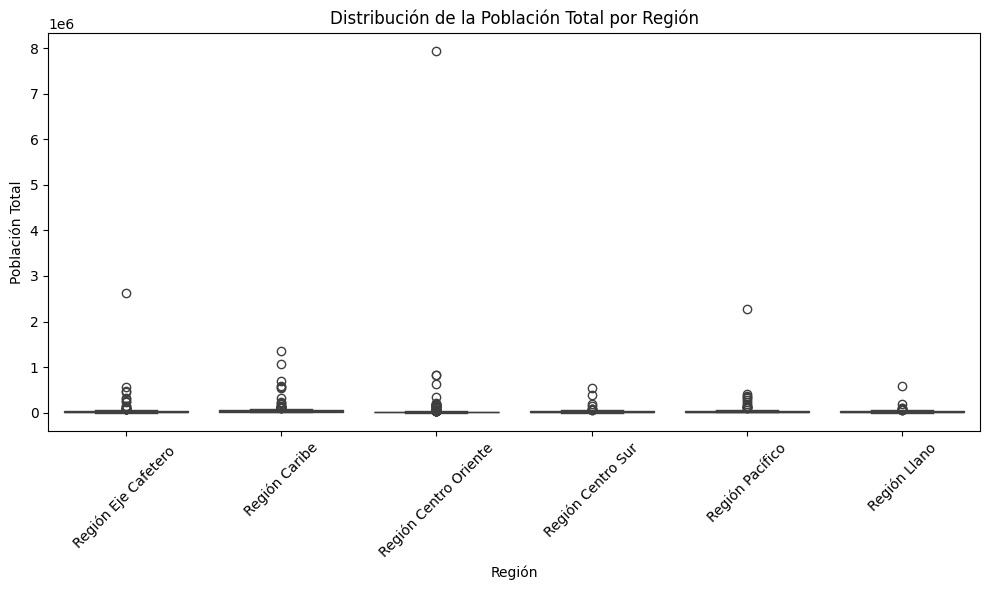

In [39]:
# Distribución de la población total por región
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_municipios_limpio, x='Region', y='PopTot')
plt.xticks(rotation=45)
plt.title('Distribución de la Población Total por Región')
plt.ylabel('Población Total')
plt.xlabel('Región')
plt.tight_layout()
plt.show()

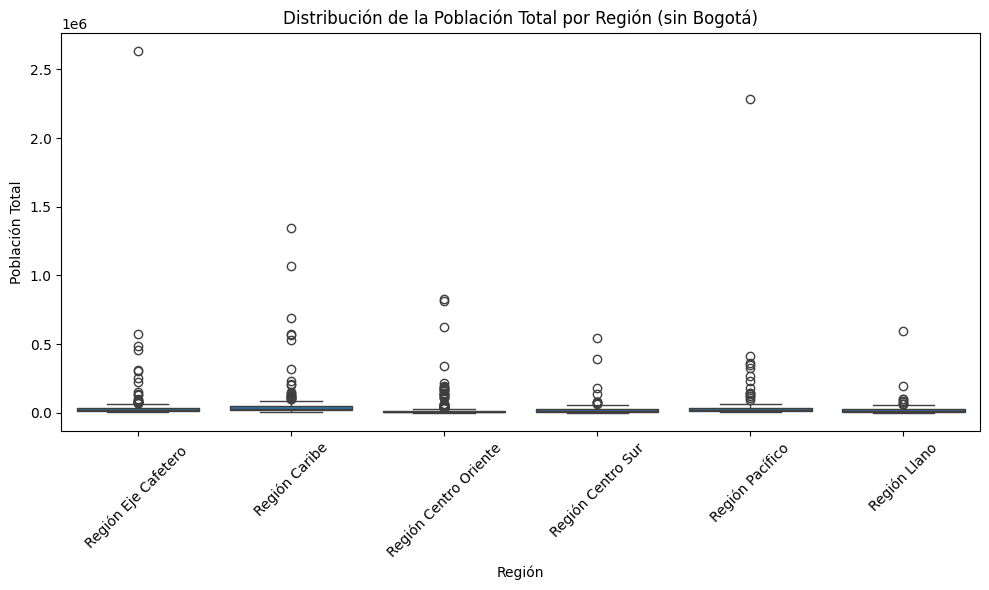

In [40]:
# Excluir BOGOTÁ de la gráfica de población total por región
df_sin_bogota = df_municipios_limpio[df_municipios_limpio['MPIO'] != 11001]

# Gráfica actualizada
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sin_bogota, x='Region', y='PopTot')
plt.xticks(rotation=45)
plt.title('Distribución de la Población Total por Región (sin Bogotá)')
plt.ylabel('Población Total')
plt.xlabel('Región')
plt.tight_layout()
plt.show()

C:\Users\luist\AppData\Local\Temp\ipykernel_6140\4146389961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_municipios_limpio['densidad'] = df_municipios_limpio['PopTot'] / df_municipios_limpio['Superficie']


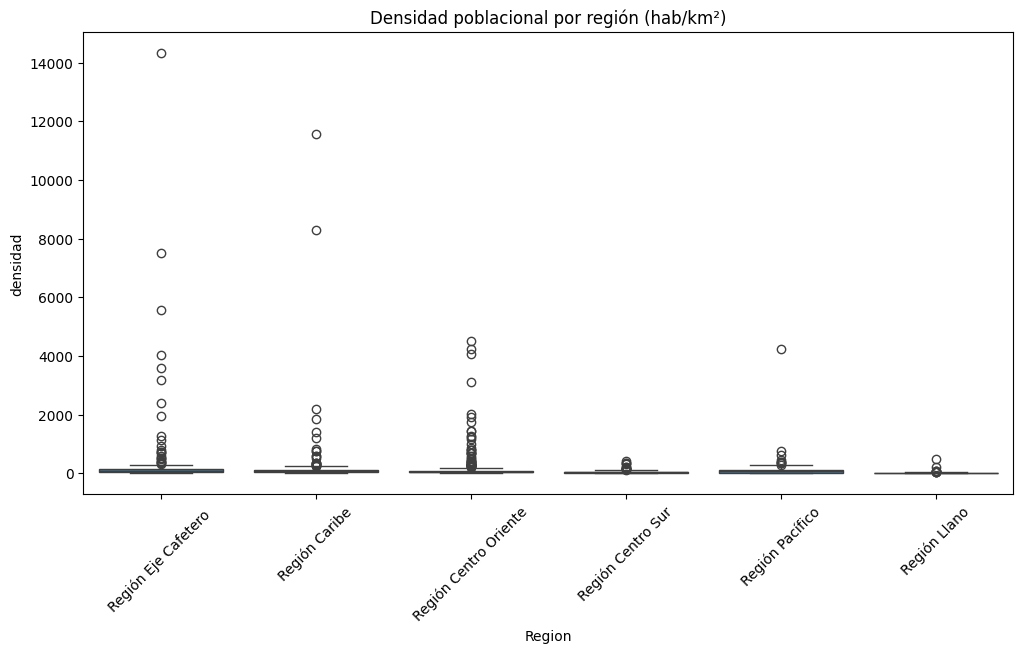

In [41]:
# Densidad poblacional
df_municipios_limpio['densidad'] = df_municipios_limpio['PopTot'] / df_municipios_limpio['Superficie']

# Densidad poblacional por región
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_municipios_limpio, x='Region', y='densidad')
plt.xticks(rotation=45)
plt.title("Densidad poblacional por región (hab/km²)")
plt.show()

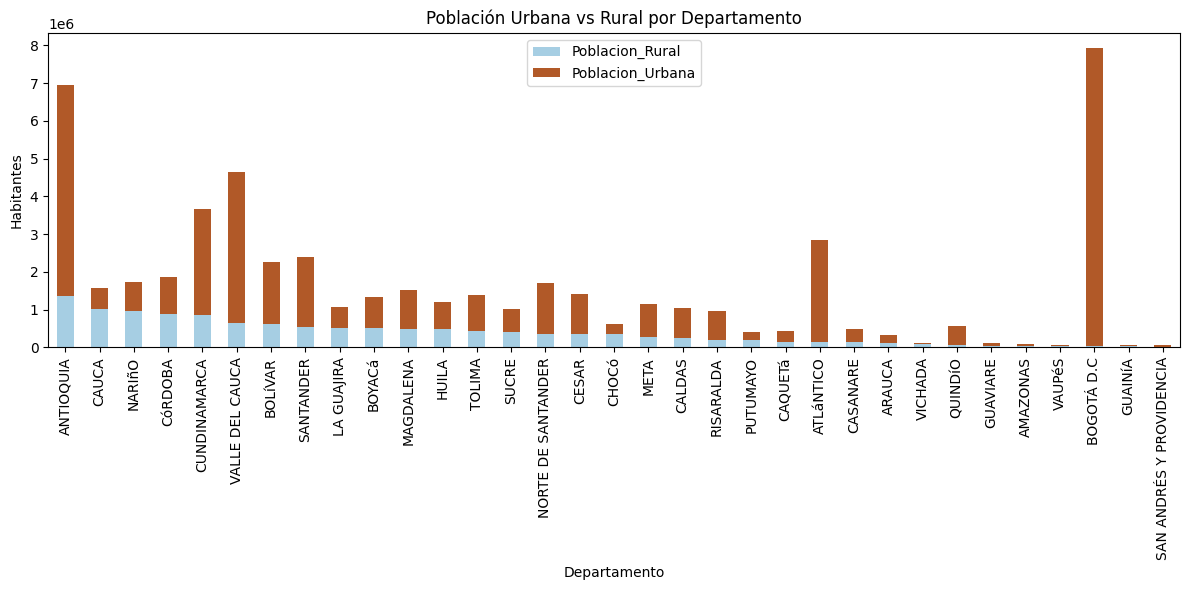

In [42]:
# Comparativa de población urbana vs rural por departamento
df_poblacion = df_municipios_limpio.groupby('Departamento')[['Poblacion_Rural', 'Poblacion_Urbana']].sum().sort_values(by='Poblacion_Rural', ascending=False)

df_poblacion.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Población Urbana vs Rural por Departamento')
plt.ylabel('Habitantes')
plt.xlabel('Departamento')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 6.2 Análisis Descriptivo de Prestadores

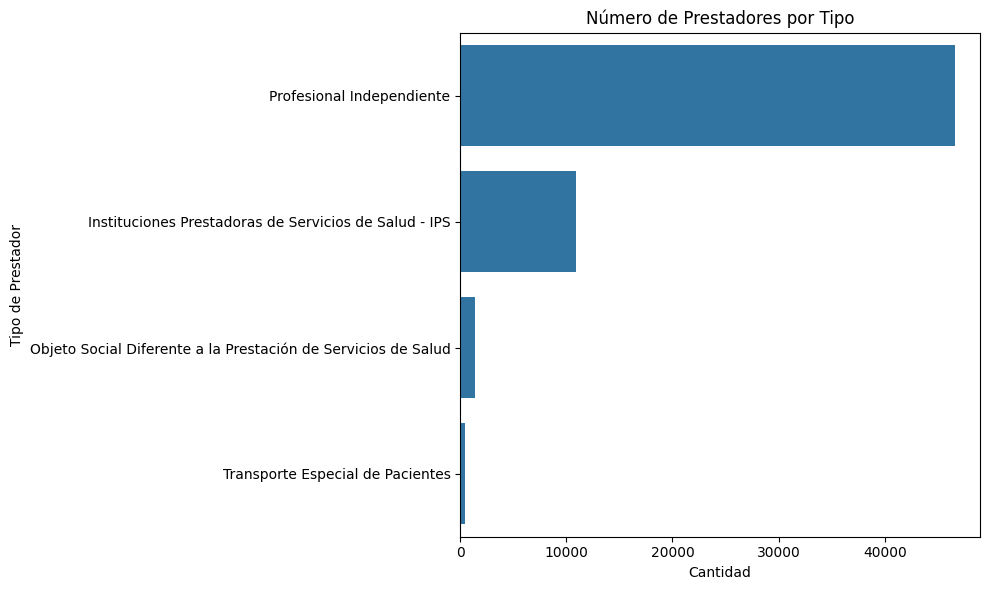

In [31]:
# Distribución por Tipo de Prestador (clpr_nombre)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_prestadores, y='clpr_nombre', order=df_prestadores['clpr_nombre'].value_counts().index)
plt.title('Número de Prestadores por Tipo')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Prestador')
plt.tight_layout()
plt.show()

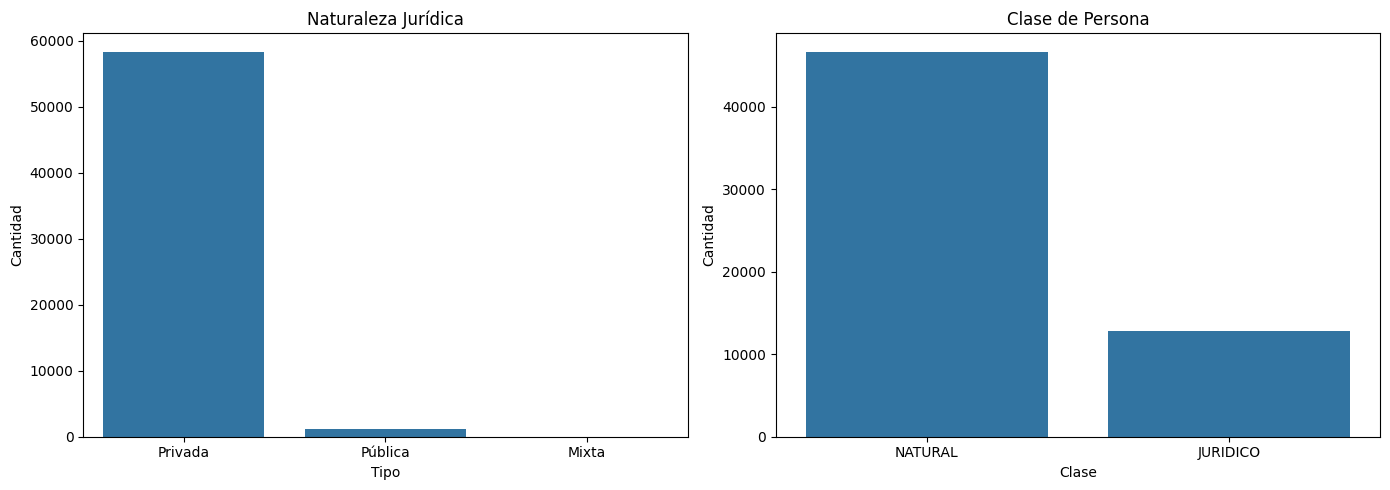

In [32]:
# Distribución por Naturaleza Jurídica (naju_nombre) y Clase de Persona
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df_prestadores, x='naju_nombre', ax=ax[0])
ax[0].set_title('Naturaleza Jurídica')
ax[0].set_xlabel('Tipo')
ax[0].set_ylabel('Cantidad')

sns.countplot(data=df_prestadores, x='clase_persona', ax=ax[1])
ax[1].set_title('Clase de Persona')
ax[1].set_xlabel('Clase')
ax[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

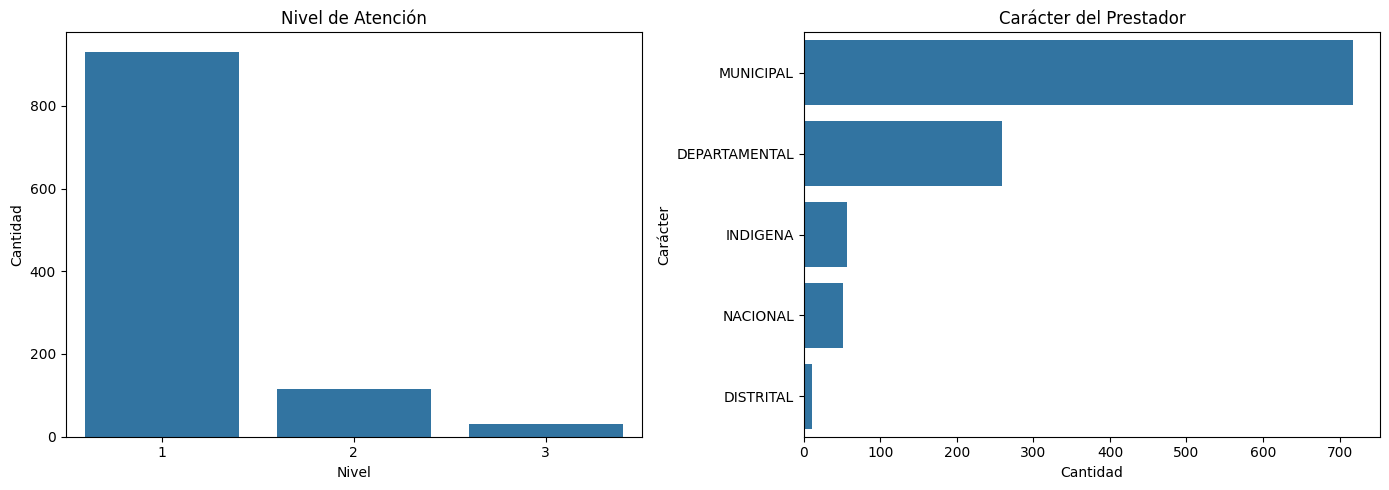

In [33]:
#  Distribución por Nivel de Atención y Caracter (Gobierno)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df_prestadores[df_prestadores['nivel'].notna()], x='nivel', order=['1', '2', '3'], ax=ax[0])
ax[0].set_title('Nivel de Atención')
ax[0].set_xlabel('Nivel')
ax[0].set_ylabel('Cantidad')

sns.countplot(data=df_prestadores[df_prestadores['caracter'].notna()], y='caracter', order=df_prestadores['caracter'].value_counts().index, ax=ax[1])
ax[1].set_title('Carácter del Prestador')
ax[1].set_ylabel('Carácter')
ax[1].set_xlabel('Cantidad')

plt.tight_layout()
plt.show()

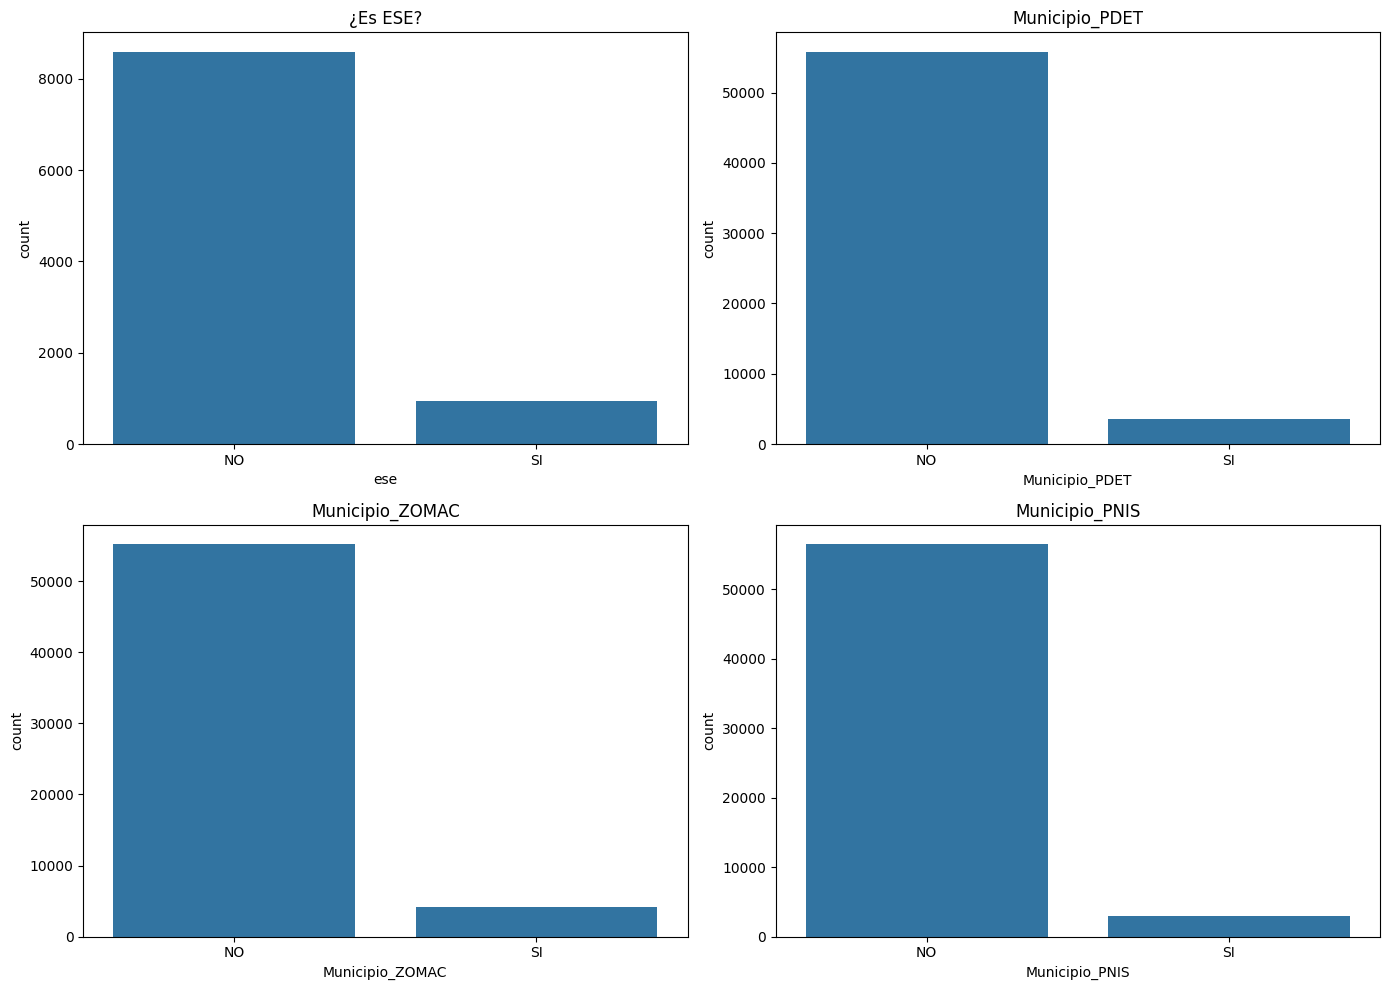

In [34]:
# Distribución ESE (Entidad Social del Estado) y Tipos de Territorio Prioritario
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=df_prestadores[df_prestadores['ese'].str.strip().isin(['SI', 'NO'])], x='ese', ax=ax[0, 0])
ax[0, 0].set_title('¿Es ESE?')

for i, col in enumerate(['Municipio_PDET', 'Municipio_ZOMAC', 'Municipio_PNIS']):
    sns.countplot(data=df_prestadores, x=col, ax=ax[(i+1)//2, (i+1)%2])
    ax[(i+1)//2, (i+1)%2].set_title(col)

plt.tight_layout()
plt.show()

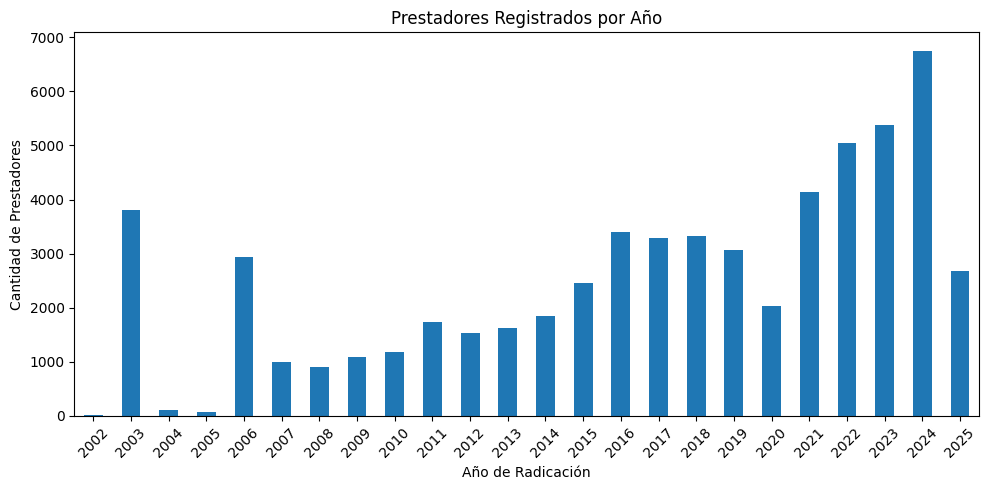

In [35]:
# Evolución en el tiempo (radicación)
radicacion_por_anio = df_prestadores['fecha_radicacion'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 5))
radicacion_por_anio.plot(kind='bar')
plt.title('Prestadores Registrados por Año')
plt.xlabel('Año de Radicación')
plt.ylabel('Cantidad de Prestadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

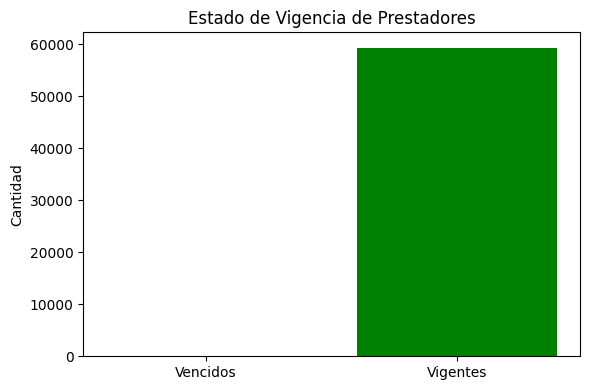

In [36]:
# Prestadores con vencimiento cercano o vencido
vencidos = df_prestadores[df_prestadores['fecha_vencimiento'] < pd.Timestamp.today()]
vigentes = df_prestadores[df_prestadores['fecha_vencimiento'] >= pd.Timestamp.today()]

plt.figure(figsize=(6, 4))
plt.bar(['Vencidos', 'Vigentes'], [len(vencidos), len(vigentes)], color=['red', 'green'])
plt.title('Estado de Vigencia de Prestadores')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

### 6.3 Análisis Descriptivo de Prestadores x Municipios

In [43]:
# Excluir los municipios específicos identificados en la limpieza de datos
municipios_excluir = [
 'ABRIAQUI', 'ALMAGUER', 'ALMEIDA', 'ALTAMIRA', 'BARRANCO MINAS', 'BELTRAN', 'BITUIMA', 'BUCARASICA', 'BUENA VISTA', 'BUSBANZA', 'CACAHUAL', 'CACOTA', 'CARCASI', 'CARURU', 'CERTEGUI', 'CHAGUANI', 'CHISCAS', 'CHITA', 'CHIVOR', 'CLEMENCIA', 'COVARACHIA', 'CRAVO NORTE', 'CUCUTILLA', 'DURANIA', 'EL CALVARIO', 'EL CASTILLO', 'EL ENCANTO', 'EL ESPINO', 'EL GUAMO', 'FUQUENE', 'GACHALA', 'GAMA', 'GAMBITA', 'GUACAMAYAS', 'GUATAQUI', 'GUAYABAL DE SIQUIMA', 'GUAYABETAL', 'GUAYATA', 'GUTIERREZ', 'HACARI', 'HATO', 'JAMBALO', 'JERUSALEN', 'JORDAN', 'JURADO', 'LA CHORRERA', 'LA ESPERANZA', 'LA GUADALUPE', 'LA MONTANITA', 'LA PEDRERA', 'LA SALINA', 'LLORO', 'LOPEZ', 'LOURDES', 'MAPIRIPANA', 'MEDIO SAN JUAN', 'MESETAS', 'MILAN', 'MIRITI PARANA', 'MORELIA', 'MORICHAL', 'MUTISCUA', 'NUQUI', 'PACOA', 'PAIME', 'PAJARITO', 'PALMAS DEL SOCORRO', 'PAMPLONITA', 'PANA PANA', 'PANDI', 'PANQUEBA', 'PAPUNAUA', 'PASCA', 'PUERTO ALEGRIA', 'PUERTO ARICA', 'PUERTO CONCORDIA', 'PUERTO NARINO', 'PUERTO RONDON', 'PULI', 'PURACE', 'QUEBRADANEGRA', 'QUETAME', 'QUIPILE', 'RECETOR', 'REGIDOR', 'RIO IRO', 'RIO QUITO', 'SACAMA', 'SAN ANDRES DE CUERQUIA', 'SAN CALIXTO', 'SAN CAYETANO', 'SAN FELIPE', 'SAN JOSE DEL PALMAR', 'SAN JUAN DE ARAMA', 'SAN JUANITO', 'SAN MATEO', 'SAN SEBASTIAN', 'SANTIAGO', 'SATIVASUR', 'SILOS', 'SOLANO', 'SOTARA', 'SUTATENZA', 'TARAIRA', 'TARAPACA', 'TEORAMA', 'TIBACUY', 'TIBIRITA', 'TOPAIPI', 'UBALA', 'URIBE', 'VILLAGOMEZ', 'YACOPI', 'YAVARATE', 'ZIPACON'
]

# Filtrar
df_municipios_filtrado = df_municipios_limpio[~(df_municipios_limpio['Municipio_std'].isin(municipios_excluir))]

In [44]:
# Se comparan nombres únicos de ciudades con DF Municipios filtrado
municipios_set = set(df_municipios_filtrado["Municipio_std"].unique())
prestadores_set = set(df_prestadores["muni_nombre_corregido"].unique())

only_in_prestadores = prestadores_set - municipios_set
only_in_municipios = municipios_set - prestadores_set

print("❌ Ciudades sólo en Prestadores:")
print(sorted(only_in_prestadores))

print("\n❌ Ciudades sólo en Municipios filtrado:")
print(sorted(only_in_municipios))

❌ Ciudades sólo en Prestadores:
[]

❌ Ciudades sólo en Municipios filtrado:
[]


In [ ]:
# Cruce de Prestadores y Municipios
df_prestadores_municipios = pd.merge(df_prestadores, df_municipios_filtrado, left_on='muni_nombre_corregido', right_on='Municipio_std', how='inner')

In [51]:
# Número total de prestadores por departamento
prestadores_por_departamento = (
    df_prestadores_municipios
    .groupby('Departamento')['codigo_habilitacion']
    .nunique()
    .sort_values(ascending=False)
)

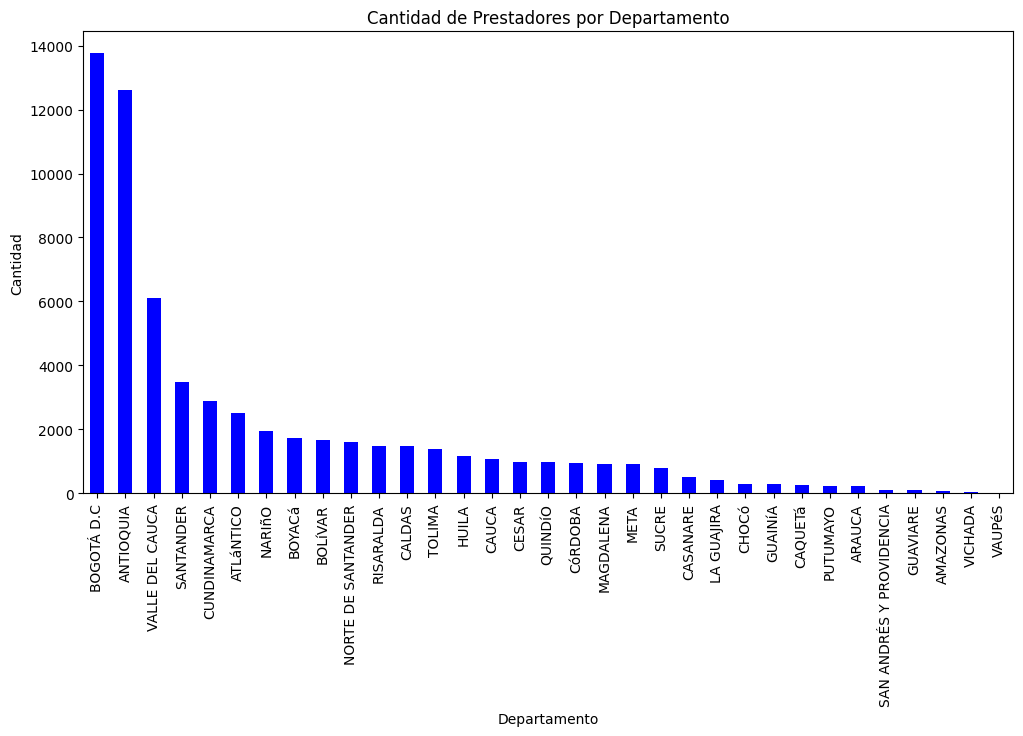

In [62]:
plt.figure(figsize=(12, 6))
prestadores_por_departamento.plot(kind='bar', title='Cantidad de Prestadores por Departamento', color='blue')
plt.title('Cantidad de Prestadores por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

In [52]:
# Prestadores por cada 10 mil habitantes a nivel municipal
prestadores_por_10mil = (
    df_prestadores_municipios
    .groupby(['Departamento', 'Municipio_std', 'Region', 'PopTot'], as_index=False)
    .agg(cantidad_prestadores=('codigo_habilitacion', 'nunique'))
)
prestadores_por_10mil['prestadores_por_10milhab'] = (
    prestadores_por_10mil['cantidad_prestadores'] * 10000 / prestadores_por_10mil['PopTot']
)

C:\Users\luist\AppData\Local\Temp\ipykernel_6140\4062495780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prestadores_por_10mil.sort_values('PopTot', ascending=False),


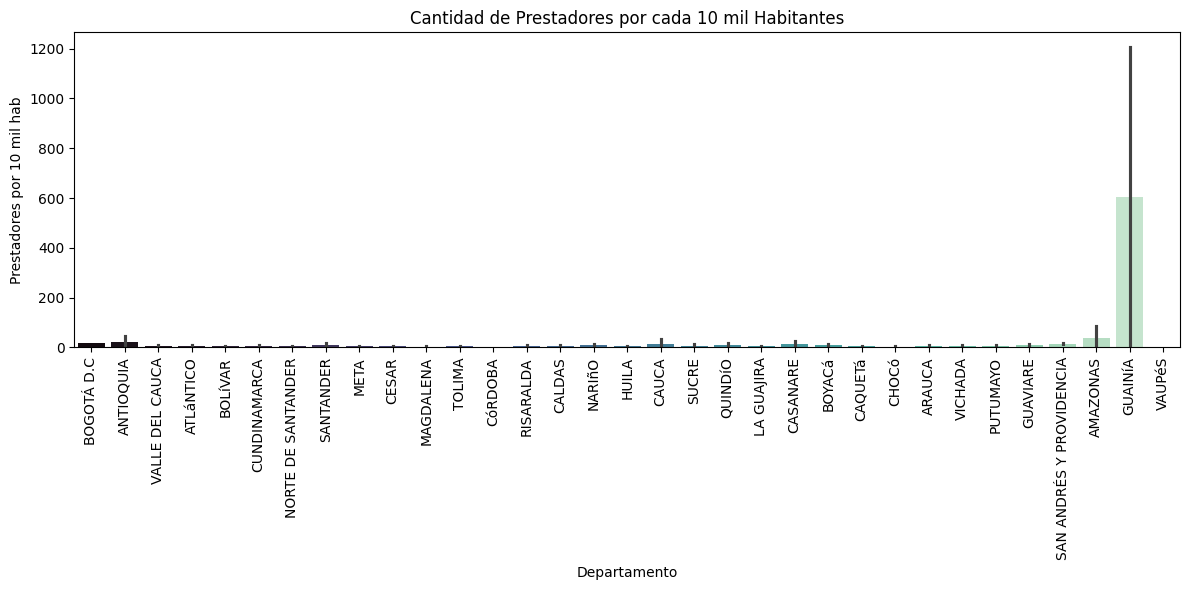

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data=prestadores_por_10mil.sort_values('PopTot', ascending=False),
            x='Departamento', y='prestadores_por_10milhab', palette='mako')
plt.title('Cantidad de Prestadores por cada 10 mil Habitantes')
plt.ylabel('Prestadores por 10 mil hab')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [53]:
# Comparación urbana vs rural: densidad de prestadores

df_prestadores_municipios['porcentaje_rural'] = df_prestadores_municipios['Poblacion_Rural'] / df_prestadores_municipios['PopTot']

# Agrupamos por municipio y analizamos relación entre ruralidad y cantidad de prestadores
ruralidad_vs_prestadores = (
    df_prestadores_municipios
    .groupby(['Municipio_std', 'Departamento'], as_index=False)
    .agg({
        'codigo_habilitacion': 'nunique',
        'PopTot': 'first',
        'Poblacion_Rural': 'first',
        'Region': 'first'
    })
)
ruralidad_vs_prestadores['porcentaje_rural'] = ruralidad_vs_prestadores['Poblacion_Rural'] / ruralidad_vs_prestadores['PopTot']

C:\Users\luist\AppData\Local\Temp\ipykernel_6140\2418854888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_prestadores_municipios, x='Region', order=df_prestadores_municipios['Region'].value_counts().index, palette='Set2')


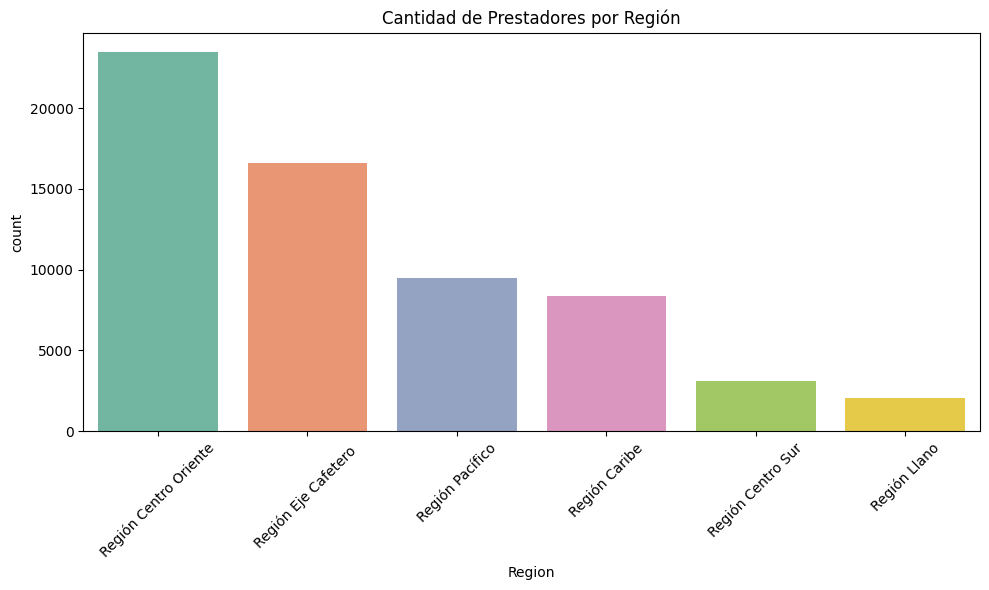

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_prestadores_municipios, x='Region', order=df_prestadores_municipios['Region'].value_counts().index, palette='Set2')
plt.title('Cantidad de Prestadores por Región')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.4 Análisis DF Consolidados: Capacidades del sistema

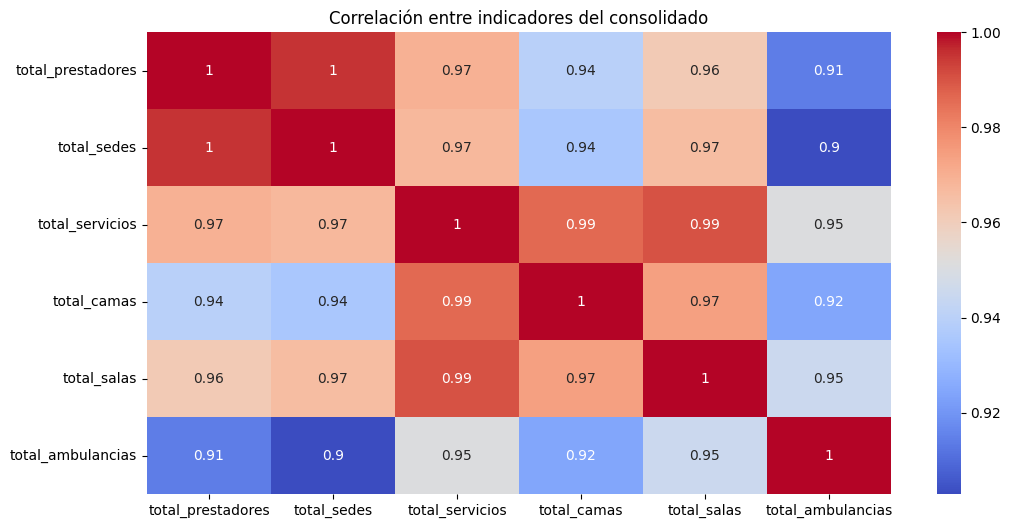

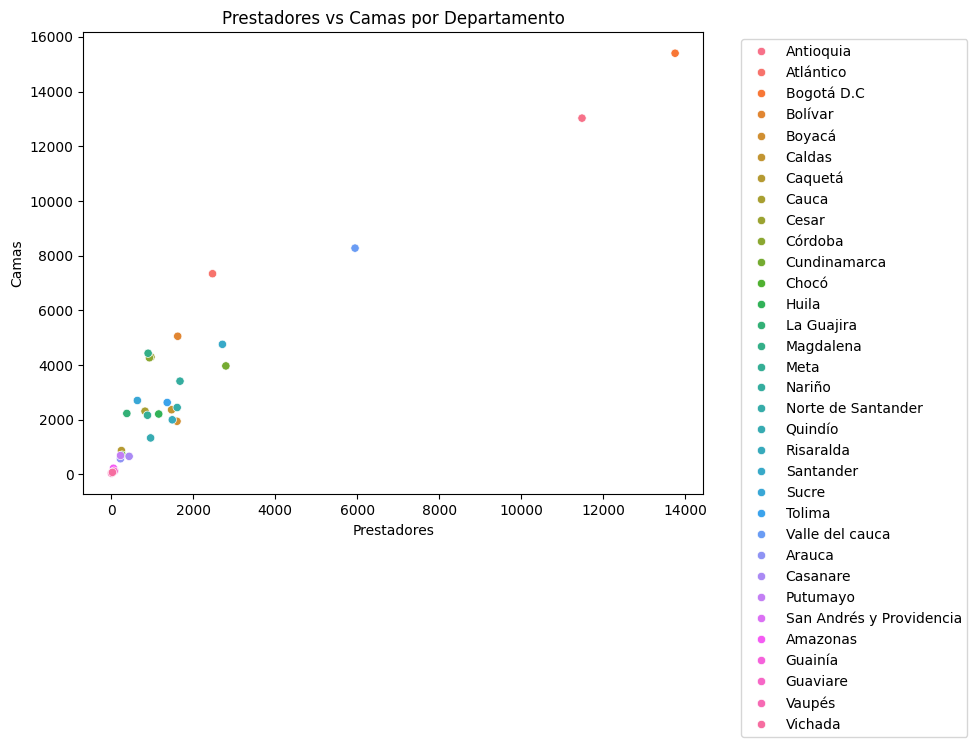

In [84]:
# Mapa de calor de servicios por departamento
plt.figure(figsize=(12, 6))
cols = ['total_prestadores', 'total_sedes', 'total_servicios', 'total_camas', 'total_salas', 'total_ambulancias']
sns.heatmap(df_consolidado[cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre indicadores del consolidado")
plt.show()

# Prestadores vs Camas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_consolidado, x='total_prestadores', y='total_camas', hue='depa_nombre')
plt.title("Prestadores vs Camas por Departamento")
plt.xlabel("Prestadores")
plt.ylabel("Camas")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 6.5 Análisis Econométrico Simple

In [76]:
# Agrupar por municipio
df_modelo = (
    df_prestadores_municipios
    .groupby(['Departamento', 'Municipio'], as_index=False)
    .agg({
        'codigo_habilitacion': 'count',  # cantidad de prestadores
        'PopTot': 'first'  # una sola vez la población total por municipio
    })
    .rename(columns={'codigo_habilitacion': 'cantidad_prestadores'})
)

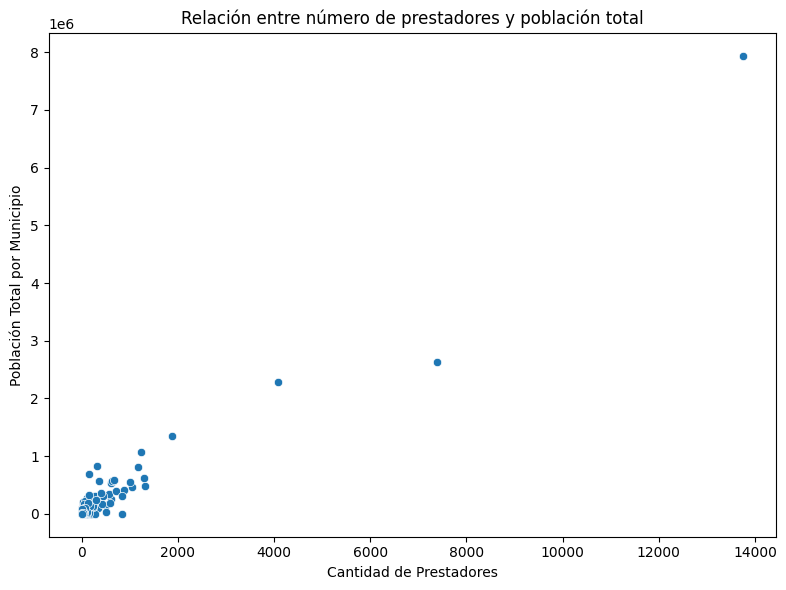

In [82]:
# Visualización exploratoria

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_modelo, x='cantidad_prestadores', y='PopTot')
plt.title('Relación entre número de prestadores y población total')
plt.xlabel('Cantidad de Prestadores')
plt.ylabel('Población Total por Municipio')
plt.tight_layout()
plt.show()

In [79]:
# Modelo de regresión lineal
X = df_modelo['cantidad_prestadores']
y = df_modelo['PopTot']

X = sm.add_constant(X)  # agrega el intercepto
modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 PopTot   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.726e+04
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        23:22:20   Log-Likelihood:                -12549.
No. Observations:                1001   AIC:                         2.510e+04
Df Residuals:                     999   BIC:                         2.511e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.867e+04 

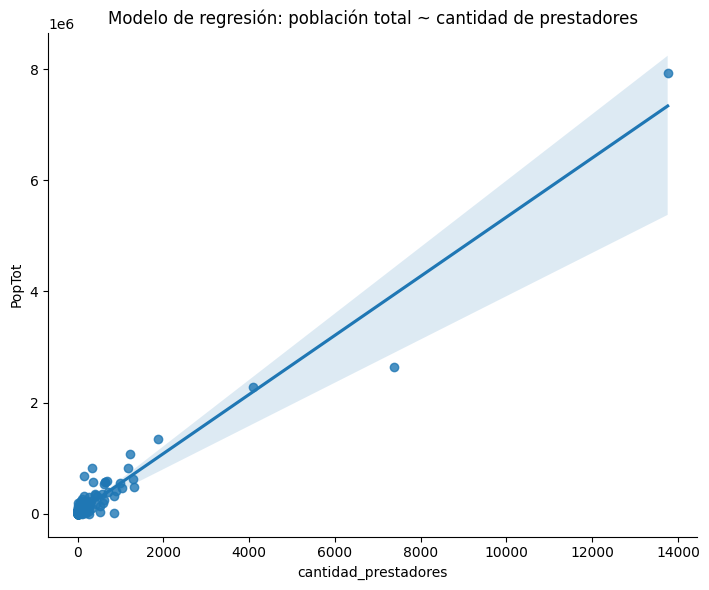

In [80]:
sns.lmplot(data=df_modelo, x='cantidad_prestadores', y='PopTot', height=6, aspect=1.2)
plt.title('Modelo de regresión: población total ~ cantidad de prestadores')
plt.tight_layout()
plt.show()